In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [64]:
auto = pd.read_csv('data/Auto.csv').set_index('name')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [65]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.9+ KB


In [66]:
auto.dropna(inplace=True)
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [67]:
# Qualitative predictors: origin, name
# Quantitative predictors: remaining

In [70]:
auto.apply(lambda x: x.max() - x.min())

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

In [81]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [79]:
auto_reduce = pd.concat([auto[:9], auto[86:]])

In [80]:
auto_reduce.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,320.000000,320.000000,320.000000,316.000000,320.000000,320.000000,320.000000,320.000000
mean,24.474375,5.362500,186.540625,100.721519,2930.318750,15.731563,77.165625,1.600000
std,7.894554,1.649499,99.372190,35.708853,809.275266,2.680366,3.107389,0.816752
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,99.500000,75.000000,2213.750000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,144.500000,90.000000,2792.500000,15.550000,77.000000,1.000000
75%,30.750000,6.000000,250.000000,115.000000,3474.750000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


In [96]:
auto.apply(['mean', 'std', lambda x: x.max() - x.min()]).rename(index={'<lambda_0>':'range'})

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
range,37.600000,5.000000,387.000000,184.000000,3527.000000,16.800000,12.000000,2.000000


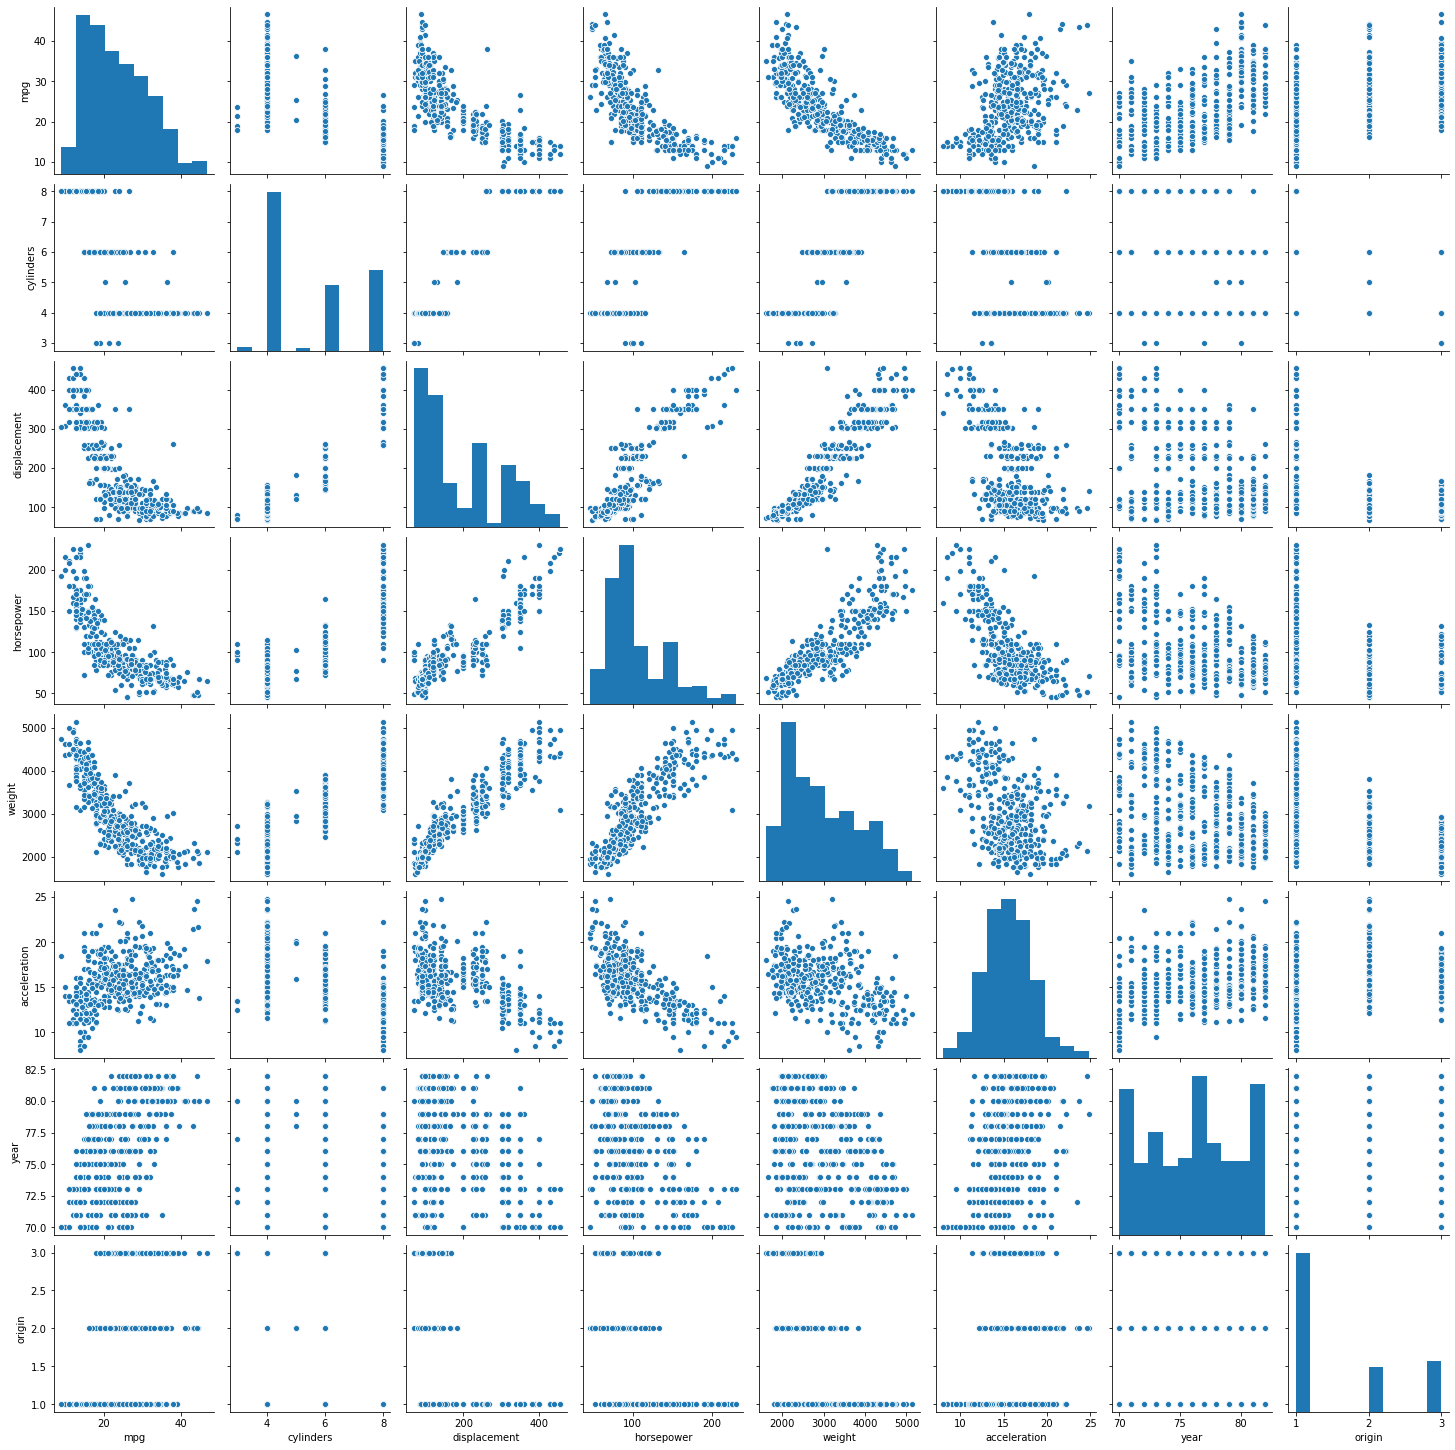

In [100]:
sb.pairplot(auto)
plt.rc('font', size=12)

In [102]:
corr_table = auto.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [103]:
corr_table[(corr_table > 0.7) | (corr_table < -0.7)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,NaN,NaN,NaN
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,NaN,NaN,NaN
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,NaN,NaN,NaN
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,NaN,NaN,NaN
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,NaN,NaN,NaN
acceleration,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
